In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import sklearn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import time 
from datetime import date
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [2]:
wine = pd.read_csv('winequality-red.csv')
wine.shape

(1599, 12)

In [3]:
df = pd.read_csv('winequality-red.csv')
df.head()
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [4]:
plt.figure(figsize = (20, 15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

In [5]:
df.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

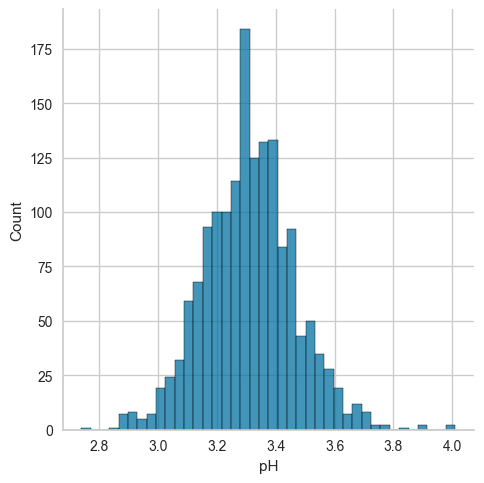

In [16]:
visual = sns.displot(df['pH'])

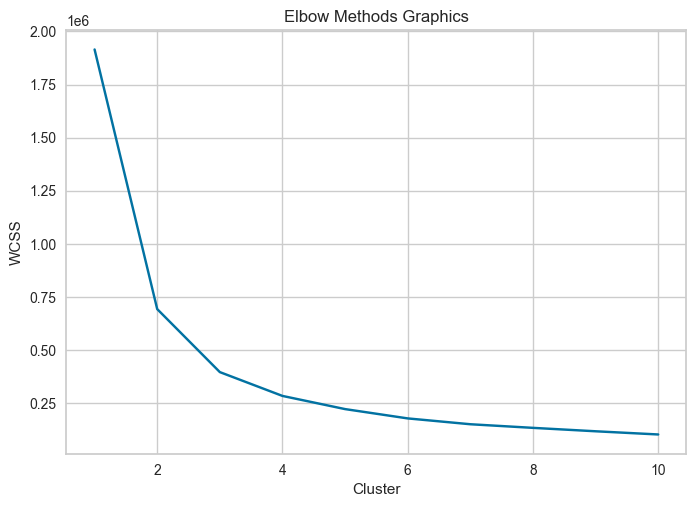

In [15]:
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', random_state= 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Methods Graphics')
plt.xlabel('Cluster')
plt.ylabel('WCSS')
plt.show()

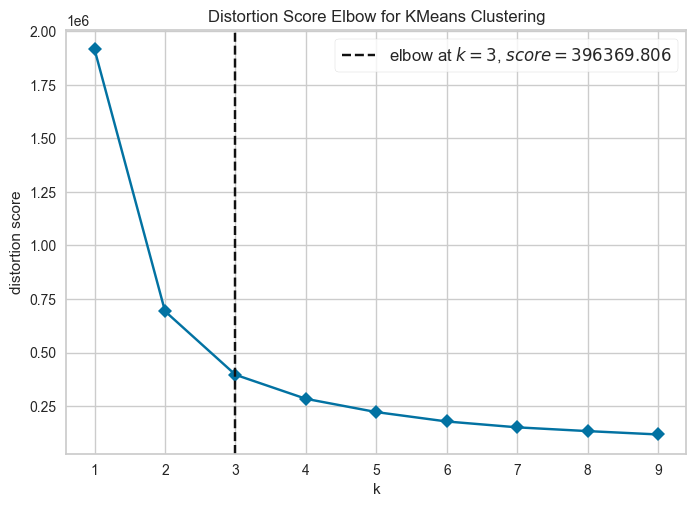

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
model = KMeans()
visible = KElbowVisualizer(model, k=(1,10), timings = False)
visible.fit(df)
visible.show()

In [13]:
from yellowbrick.cluster import KElbowVisualizer

In [17]:
bca = PCA()
X = bca.fit_transform(df)
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(X)
graphics = np.unique(label)

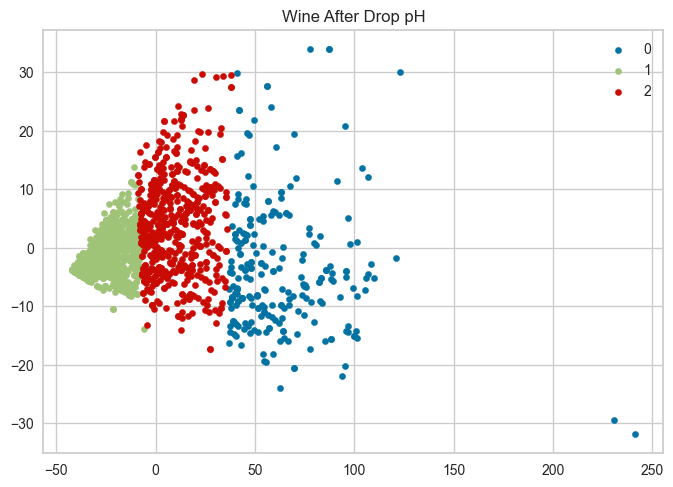

In [18]:
for i in graphics:
    plt.scatter(X[label==i,0], X[label==i,1], label=i, s=20)
    
plt.legend()
plt.title('Wine After Drop pH')
plt.show()